In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 123kHFhIQgugtkE-Db11CxVCJV8GtHa8e

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From (uriginal): https://drive.google.com/uc?id=123kHFhIQgugtkE-Db11CxVCJV8GtHa8e
From (redirected): https://drive.google.com/uc?id=123kHFhIQgugtkE-Db11CxVCJV8GtHa8e&confirm=t&uuid=ddadfa49-5157-4caf-8265-e8ab67194b63
To: /content/datafiner.mat
100% 180k/180k [00:00<00:00, 86.5MB/s]


In [11]:
import scipy.io
import plotly.graph_objs as go
import numpy as np

# load data
data = scipy.io.loadmat('/content/datafiner.mat')
x = data['datafiner'][:, 0]
y = data['datafiner'][:, 1]
z = data['datafiner'][:, 2]
ecEx = data['datafiner'][:, 3]
ec2Ex = data['datafiner'][:, 4]
ecEy = data['datafiner'][:, 5]
ec2Ey = data['datafiner'][:, 6]
ecEz = data['datafiner'][:, 7]
ec2Ez = data['datafiner'][:, 8]

# Electric potential
ecSum = ecEy + ec2Ey

# amplitude modulation y
ecAmpy = np.abs(np.sqrt((ecEy + ec2Ey)**2) - np.sqrt((ecEy - ec2Ey)**2))

# amplitude modulation x
ecAmpx = np.abs(np.sqrt((ecEx + ec2Ex)**2) - np.sqrt((ecEx - ec2Ex)**2))

# AMy plot
fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=ecAmpy,
                                alphahull=0,
                                color='lightpink',
                                intensity=ecAmpy,
                                flatshading=True)])
fig.update_layout(scene=dict(xaxis_title='x',
                             yaxis_title='y',
                             zaxis_title='Modulation Amplitude (V/m)'),
                  scene_camera=dict(up=dict(x=0, y=0, z=1),
                                    center=dict(x=0, y=0, z=0),
                                    eye=dict(x=1.25, y=1.25, z=1.25)))
fig.show()

# AMx plot
fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=ecAmpx,
                                alphahull=0,
                                color='lightpink',
                                intensity=ecAmpx,
                                flatshading=True)])
fig.update_layout(scene=dict(xaxis_title='x',
                             yaxis_title='y',
                             zaxis_title='Modulation Amplitude (V/m)'),
                  scene_camera=dict(up=dict(x=0, y=0, z=1),
                                    center=dict(x=0, y=0, z=0),
                                    eye=dict(x=1.25, y=1.25, z=1.25)))
fig.show()

# Max position AMy
I = np.argmax(ecAmpy)
Xy = x[I]
Yy = y[I]
Zy = z[I]

# Max position AMx
I = np.argmax(ecAmpx)
Xx = x[I]
Yx = y[I]
Zx = z[I]

# Electric potential plot
fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=ecSum,
                                alphahull=0,
                                color='lightpink',
                                intensity=ecSum,
                                flatshading=True)])
fig.update_layout(scene=dict(xaxis_title='x',
                             yaxis_title='y',
                             zaxis_title='Electric Fields (V/m)'),
                  scene_camera=dict(up=dict(x=0, y=0, z=1),
                                    center=dict(x=0, y=0, z=0),
                                    eye=dict(x=1.25, y=1.25, z=1.25)))
fig.show()

# AMy in y view
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=ecAmpy,
                                   mode='markers',
                                   marker=dict(size=10,
                                               color=ecAmpy,
                                               colorscale='Viridis',
                                               opacity=0.8))])
fig.update_layout(scene=dict(xaxis_title='x',
                             yaxis_title='y',
                             zaxis_title='Modulation Amplitude (V/m)'),
                  scene_camera=dict(up=dict(x=0, y=0, z=1),
                                    center=dict(x=0, y=0, z=0),
                                    eye=dict(x=0, y=1.5, z=0)))
fig.show()

# AMy in x view
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=ecAmpy,mode='markers',
                                   marker=dict(size=10,
                                               color=ecAmpy,
                                               colorscale='Viridis',
                                               opacity=0.8))])
fig.update_layout(scene=dict(xaxis_title='x',
                             yaxis_title='y',
                             zaxis_title='Modulation Amplitude (V/m)'),
                  scene_camera=dict(up=dict(x=0, y=0, z=1),
                                    center=dict(x=0, y=0, z=0),
                                    eye=dict(x=1.5, y=0, z=0)))
fig.show()

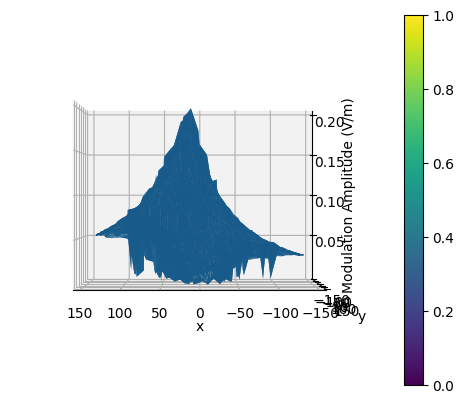

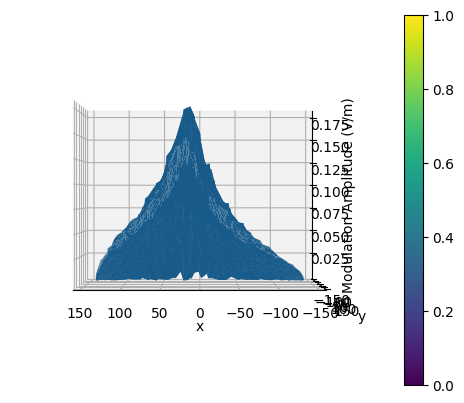

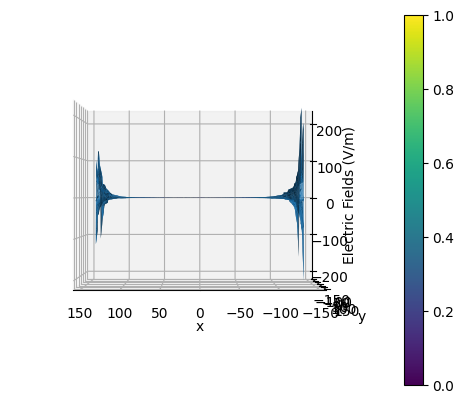

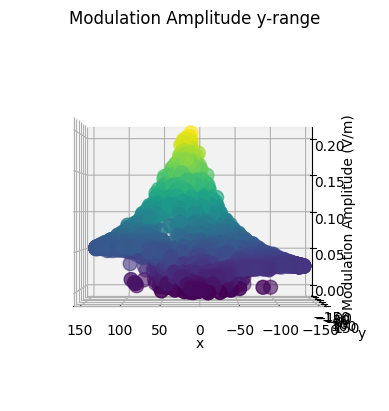

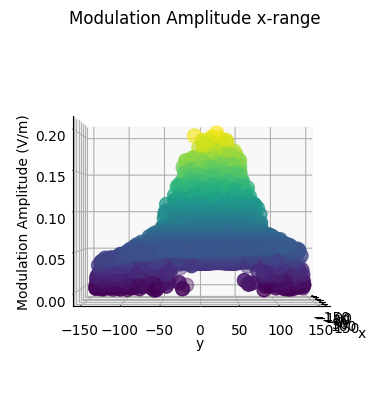

In [10]:
import scipy.io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# load data
data = scipy.io.loadmat('/content/datafiner.mat')
x = data['datafiner'][:, 0]
y = data['datafiner'][:, 1]
z = data['datafiner'][:, 2]
ecEx = data['datafiner'][:, 3]
ec2Ex = data['datafiner'][:, 4]
ecEy = data['datafiner'][:, 5]
ec2Ey = data['datafiner'][:, 6]
ecEz = data['datafiner'][:, 7]
ec2Ez = data['datafiner'][:, 8]

# Electric potential
ecSum = ecEy + ec2Ey

# amplitude modulation y
ecAmpy = np.abs(np.sqrt((ecEy + ec2Ey)**2) - np.sqrt((ecEy - ec2Ey)**2))

# amplitude modulation x
ecAmpx = np.abs(np.sqrt((ecEx + ec2Ex)**2) - np.sqrt((ecEx - ec2Ex)**2))

# AMy plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
T = ax.plot_trisurf(x, y, ecAmpy)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Modulation Amplitude (V/m)')
ax.view_init(0, 90)
fig.colorbar(T, ax=ax)
plt.show()

# AMx plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
T = ax.plot_trisurf(x, y, ecAmpx)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Modulation Amplitude (V/m)')
ax.view_init(0, 90)
fig.colorbar(T, ax=ax)
plt.show()

# Max position AMy
I = np.argmax(ecAmpy)
Xy = x[I]
Yy = y[I]
Zy = z[I]

# Max position AMx
I = np.argmax(ecAmpx)
Xx = x[I]
Yx = y[I]
Zx = z[I]

# Electric potential plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
T = ax.plot_trisurf(x, y, ecSum)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Electric Fields (V/m)')
ax.view_init(0, 90)
fig.colorbar(T, ax=ax)
plt.show()

# AMy in y view
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
s = 100*np.ones_like(ecAmpy)
ax.scatter(x, y, ecAmpy, s=s, c=ecAmpy)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Modulation Amplitude (V/m)')
ax.view_init(0, 90)
plt.title('Modulation Amplitude y-range')
plt.show()

# AMy in x view
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
s = 100*np.ones_like(ecAmpy)
ax.scatter(x, y, ecAmpy, s=s, c=ecAmpy)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Modulation Amplitude (V/m)')
ax.view_init(0, 0)
plt.title('Modulation Amplitude x-range')
plt.show()